<a href="https://colab.research.google.com/github/kittimaxz/Project_BoneAge/blob/main/Toy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is an attempt to predict bone age using Xception(pre trained model)

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra # เป็นการ import numpy เพื่อเปิดใช้ฟังก์ชันในการทำงาน
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) # เป็น library ในการจัดการ dataframe
import tensorflow as tf #library สำหรับสร้าง machine learning models แบบ open source จาก Google
import datetime # datetime ใช้ในการจัด format ของวัน-เวลาให้อยู่ในรูปแบบที่ต้องการ 
import math # เรียกใช้ module เพื่อคำนวณค่าต่างๆ 
import matplotlib.pyplot as plt # เป็น module พื้นฐานที่ใช้ในการสร้างกราฟของ python
import seaborn as sns # เป็นฟังก์ชันเสริมที่ใช้สร้างกราฟให้มีความสวยงามมากขึ้น
from sklearn.model_selection import train_test_split # เป็น library ในการพัฒนาโปรแกรมโดยใช้การเรียนรู้ของเครื่อง

In [38]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่าMounted at /content/drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์

In [40]:
path = '/content/drive/My Drive/Project_Boneage'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

# ***Some Setup***

The cell below creates the pandas dataframes for training and testing.

In [41]:
#loading dataframes # เอาที่อยู่ของไฟล์เชื่อมกับที่อยู่ของไฟล์เรา โดยกำหนดชื่่อไฟล์ที่เราต้องการ
train_path = os.path.join(path,'boneage-training-dataset.csv')
train_df = pd.read_csv(train_path)
test_path = os.path.join(path,'boneage-test-dataset.csv')
test_df = pd.read_csv(test_path)

In [42]:
train_df # แสดง data 'train_df'

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False
...,...,...,...
12606,15605,50,False
12607,15606,113,False
12608,15608,55,False
12609,15609,150,True


In [43]:
test_df # แสดง data 'test_df'

,Case ID,Sex
0,4360,M
1,4361,M
2,4362,M
3,4363,M
4,4364,M
...,...,...
195,4555,F
196,4556,F
197,4557,F
198,4558,F


In [44]:
#appending file extension to id column for both training and testing dataframes
# ต่อท้าย data ใน column 'id' ด้วย .png
train_df['id'] = train_df['id'].apply(lambda x: str(x)+'.png') # ทำการเปลี่ยน type ใน column 'id' จาก int  เป็น string เพื่อให้สามารถต่อท้ายด้วย .png ได้ # ฟังก์ชันแลมบ์ดาเป็นฟังก์ชันที่ไม่ระบุตัวตนขนาดเล็ก
test_df['Case ID'] = test_df['Case ID'].apply(lambda x: str(x)+'.png') 

train_df.head() # แสดงค่าของ train_df บางส่วน

,id,boneage,male
0,1377.png,180,False
1,1378.png,12,False
2,1379.png,94,False
3,1380.png,120,True
4,1381.png,82,False


# Some EDA and feature engineering follow

In [45]:
#finding out the number of male and female children in the dataset
#creating a new column called gender to keep the gender of the child as a string
train_df['gender'] = train_df['male'].apply(lambda x: 'male' if x else 'female') # ทำการเปลี่ยนค่าข้อมูล gender จาก true -> male, false -> female 
train_df['gender']

0        female
1        female
2        female
3          male
4        female
          ...  
12606    female
12607    female
12608    female
12609      male
12610      male
Name: gender, Length: 12611, dtype: object

In [46]:
print(train_df['gender'].value_counts()) #แสดงจำนวนเพศหญิงและเพศชายทั้งหมดใน trian_df

male      6833
female    5778
Name: gender, dtype: int64


In [47]:
train_df.shape # ข้อมูลมีทั้งหมด 12611 จากทั้งหมด 4 column

(12611, 4)

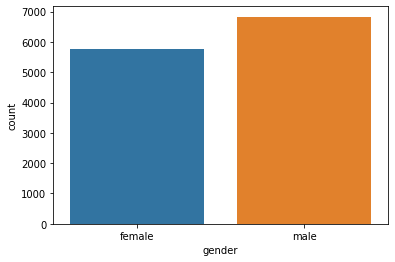

In [48]:
sns.countplot(x = train_df['gender']) # plot กราฟแสดงจำนวนเพศหญิงและเพศชายทั้งหมดใน trian_df

In [49]:
#oldest child in the dataset
print('MAX age: ' + str(train_df['boneage'].max()) + ' months') # ทำการหาอายุที่มากที่สุด และทำการต่อท้ายด้วย months

MAX age: 228 months


In [50]:
#youngest child in the dataset
print('MIN age: ' + str(train_df['boneage'].min()) + ' months')  # ทำการหาอายุที่น้อยที่สุด และทำการต่อท้ายด้วย months

MIN age: 1 months


In [51]:
#mean age is # หาค่าเฉลี่ยอายุกระดูก
mean_bone_age = train_df['boneage'].mean() 
print('mean: ' + str(mean_bone_age))

mean: 127.3207517246848


In [52]:
#median bone age # หาค่า median ของอายุกระดูก
print('median: ' +str(train_df['boneage'].median()))

median: 132.0


In [53]:
#standard deviation of boneage # หาค่าส่วนเบี่ยงเบนมาตรฐานของอายุกระดูก
std_bone_age = train_df['boneage'].std()
std_bone_age

41.182021399396326

In [54]:
#models perform better when features are normalised to have zero mean and unity standard deviation
#using z score for the training 
# ทำการหาค่า z-score 
train_df['bone_age_z'] = (train_df['boneage'] - mean_bone_age)/(std_bone_age)
print(train_df.head())

         id  boneage   male  gender  bone_age_z
0  1377.png      180  False  female    1.279181
1  1378.png       12  False  female   -2.800269
2  1379.png       94  False  female   -0.809109
3  1380.png      120   True    male   -0.177766
4  1381.png       82  False  female   -1.100498


Text(0.5, 1.0, 'Number of children in each age group')

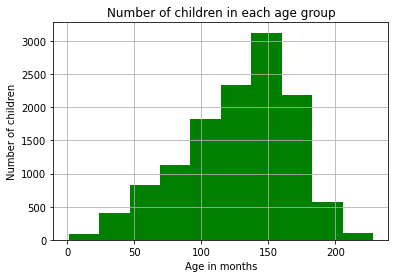

In [55]:
#plotting a histogram for bone ages # plot กราฟ เพื่อดูการกระจายของอายุกระดูก
train_df['boneage'].hist(color = 'green')
plt.xlabel('Age in months')
plt.ylabel('Number of children')
plt.title('Number of children in each age group')

Text(0.5, 1.0, 'Relationship between number of children and bone age z score')

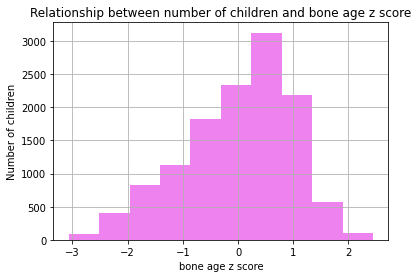

In [56]:
train_df['bone_age_z'].hist(color = 'violet') # plot กราฟ เพื่อดูการกระจายค่า z-score ของอายุกระดูก
plt.xlabel('bone age z score')
plt.ylabel('Number of children')
plt.title('Relationship between number of children and bone age z score')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


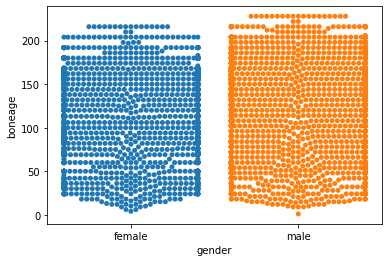

In [57]:
#Relationship between age and gender with a categorical scatter plot (swarmplot) # plot ดูความสัมพันธ์ระหว่างอายุและเพศ
# swarmplot ใช้ plot เพื่อดูการกระจายของข้อมูลโดยที่จุดไม่ทับซ้อนกัน
sns.swarmplot(x = train_df['gender'], y = train_df['boneage'])

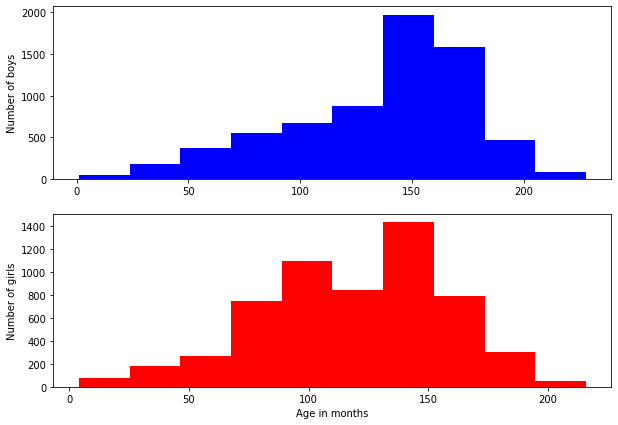

In [58]:
#distribution of age within each gender # plot การกระจายอายุกระดูกของแต่ละเพศ
male = train_df[train_df['gender'] == 'male']
female = train_df[train_df['gender'] == 'female']
fig, ax = plt.subplots(2,1)
ax[0].hist(male['boneage'], color = 'blue')
ax[0].set_ylabel('Number of boys')
ax[1].hist(female['boneage'], color = 'red')
ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Number of girls')
fig.set_size_inches((10,7))

In [59]:
#splitting train dataframe into traininng and validation dataframes #แบ่งข้อมูลออกเป็น 2 ส่วน ด้วยการสุ่ม
df_train, df_valid = train_test_split(train_df, test_size = 0.2, random_state = 0) 
# test_size = 0.2 คือ สัดส่วนของข้อมูลที่ใช้ในการทดสอบ (หากไม่มีการกำหนดค่าจะถูก set = 0.25)# random_state ใช้ในการสุ่มแบ่งกลุ่ม (default=None)

In [60]:
df_train # training

,id,boneage,male,gender,bone_age_z
8079,10538.png,132,False,female,0.113624
7248,9608.png,168,True,male,0.987791
204,1607.png,162,True,male,0.842097
10651,13424.png,162,True,male,0.842097
9283,11898.png,168,True,male,0.987791
...,...,...,...,...,...
4859,6961.png,60,True,male,-1.634712
3264,5198.png,106,False,female,-0.517720
9845,12527.png,120,False,female,-0.177766
10799,13593.png,144,False,female,0.405013


In [61]:
df_valid # validation

,id,boneage,male,gender,bone_age_z
5112,7239.png,94,False,female,-0.809109
9866,12548.png,174,True,male,1.133486
2760,4640.png,144,False,female,0.405013
6184,8432.png,168,True,male,0.987791
6803,9121.png,108,True,male,-0.469155
...,...,...,...,...,...
10027,12722.png,150,True,male,0.550708
5928,8150.png,132,False,female,0.113624
5354,7509.png,144,False,female,0.405013
8548,11062.png,156,False,female,0.696402
